### **Estructurando un Proyecto de DS - Borda y Pagano**

**Consigna**

Crearán un notebook que deberá tener en primera instancia un resumen (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. 

Continuaremos trabajando con base en lo realizado en el Desafío entregable: Visualización en Python, en esta oportunidad deberemos complementar con lo siguiente:

1.  Generar preguntas de interés o hipótesis de interés sobre el dataset elegido para el proyecto final.
2.  Crear visualizaciones (univariados, bivariados o trivariados) junto con resúmenes numéricos básicos acordes con los tipos de variables disponibles.
3.  Interpretar los resultados obtenidos



El siguiente trabajo tiene como objetivo analizar las caracteriticas de las ventas de videojuegos en los tres mayores mercados del mundo (Estados Unidos, Europa y Japon). Cada mercado tiene caracteristicas unicas por lo que es fundamental tener claro como es cada uno al momento de desarrollar videojuegos. Si tenemos claro a que publico apuntamos podemos saber como tiene que ser lo que desarrollemos. 
Para este trabajo hemos utilzado un DataSet publico de Kaggle. La informacion esta divida por mercados, genero de videojuego y año de venta.
Tenemos la creencia de que cada mercado es unico en sus caracteristicas y no se parecen uno al otro, por lo que si queremos ser lideres en ventas tenemos que tener claro a quien le queremos vender.
Todas estos analisis los iremos realizando y comentando a lo largo del trabajo para darle una vision amplia de los mercados y los videojuegos. 
Despues de dar un rapido vistaso a los graficos es evidente como los mercados Europeos y Estadounidense son similiares en cuanto a sus gustos aunque muy diferentes al mercado Japones. Si uno quiere triunfar en Estados Unidos o Europa es probable que deba desarrollar videojuegos para PlayStation o Xbox; en cambio, si quiere triunar en Japon deberiamos desarrollar videojuegos para Nintendo. Por otro lado si deseamos desarrollar videojuegos para los dos primeros debemos orientarnos hacia los shooters, pero en el pais oriental deberiamos apuntar a los RPG.
Por otro lado, podemos ver caracteristicas similares entre los mercados, por ejemplo la clasificacion mas vendida en los tres mercados es 'E' (Para todo publico).

Por esta razon, nos surgen las siguientes preguntas: ¿Por que razon existen  diferencias tan marcadas en los gustos de los consumidores de videojuegas occidentales y orientales? ¿Como influyen los juegos de determinadas plataformas en las ventas? ¿Que region genera mas ganancias para las grandes empresas de videojuegos? ¿Cual desarrollador es mas dominante en relacion de cantidad de lanzamientos y ventas conseguidas? 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Data Science/Proyecto DS/Video_Games_Sales.csv')

EDA - EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [ ]:
df.head(6)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,NaN,NaN,NaN,NaN,NaN,NaN,30.26


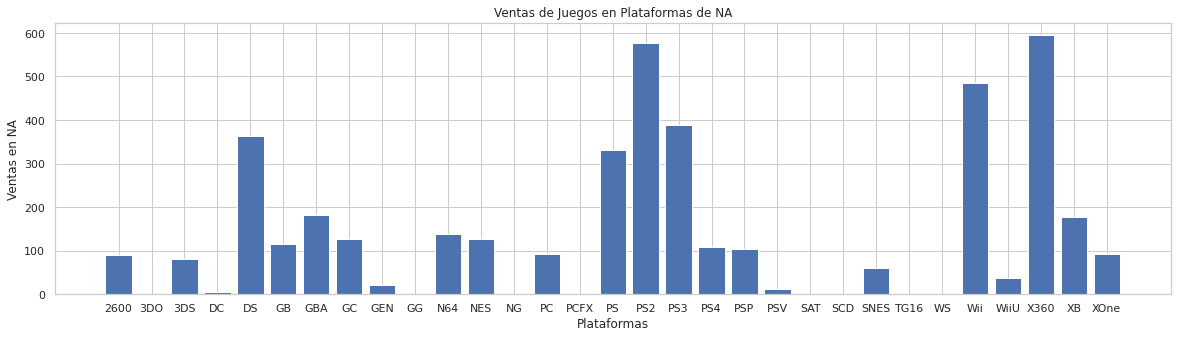

In [ ]:
df_2 = df[['NA_Sales','Platform']].groupby(by='Platform').sum('NA_Sales')
df_2
df_2.index
fig, ax = plt.subplots(figsize=(20,5))
x = df_2.index
y = df_2.NA_Sales
ax.set_xlabel('Plataformas')
ax.set_ylabel('Ventas en NA')
ax.set_title('Ventas de Juegos en Plataformas de NA')
plt.bar (x,y)
plt.show()

Por el grafico anterior podemos observar como las consolas con mas ventas de juegos son la Xbox 360, la PlayStation 2 y la Nintendo DS. Ninguna de ellas es la consola de ultima generacion, lo que se puede deber a dos principales caracteristicas, el tiempo que las consolas tienen en el mercado es superior a las consolas de ultima generacion como la PS4 y la accesibilidad economica es superior a estas tambien.

Text(0.5, 1.0, '¿Que generos de juegos se vendieron mas en NA?')

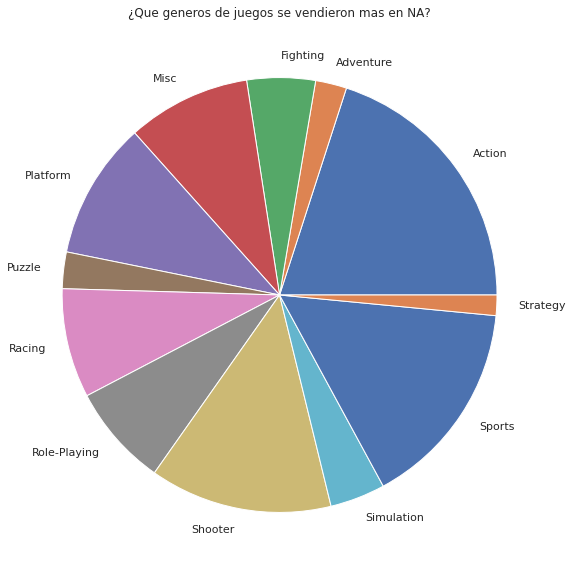

In [ ]:
df_3 = df[['NA_Sales','Genre']].groupby(by='Genre').sum('NA_Sales')
df_3
plt.figure(figsize=(20,10))
plt.pie(df_3.NA_Sales, labels = df_3.index)
plt.title('¿Que generos de juegos se vendieron mas en NA?')

Segun lo graficado en este caso podemos ver como los juegos mas vendidos en los estados unidos son los juegos de accion (incluyendo los Shooters) y los de deportes. Para penetrar en este mercado seria ideal desarrollar juegos de estos generos.

Text(0.5, 0, 'Plataforma')

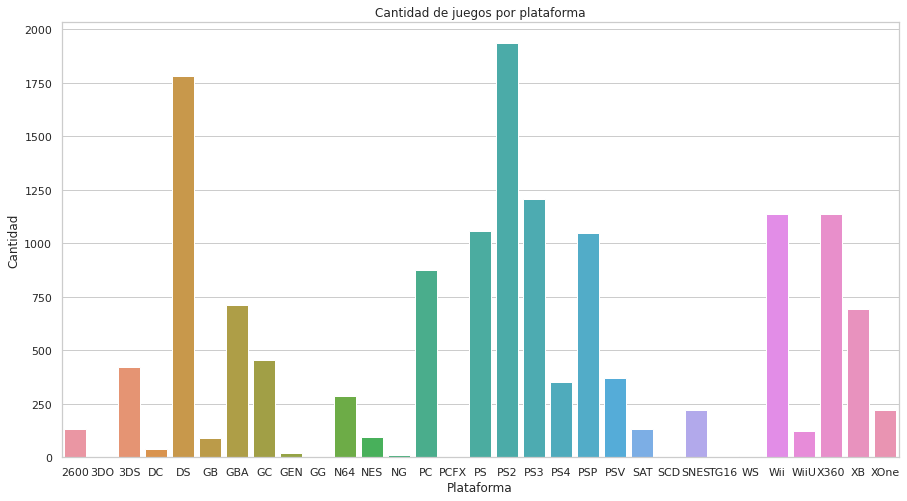

In [ ]:
agr = df[['Genre','Platform']].groupby('Platform').count()
agr = agr.reset_index()
sns.barplot(x='Platform', y='Genre', data=agr)
plt.title("Cantidad de juegos por plataforma")
plt.ylabel("Cantidad")
plt.xlabel("Plataforma")

En contraposicion con el primer grafico podemos ver como a nivel mundial las plataformas que mas juegos han vendido son la PS2 y la DS, muy superiores a la XBOX 360. Esto se debe al resto de los mercados, principalmente el mercado japones que utiliza mas las consolas de Nintendo.

[]

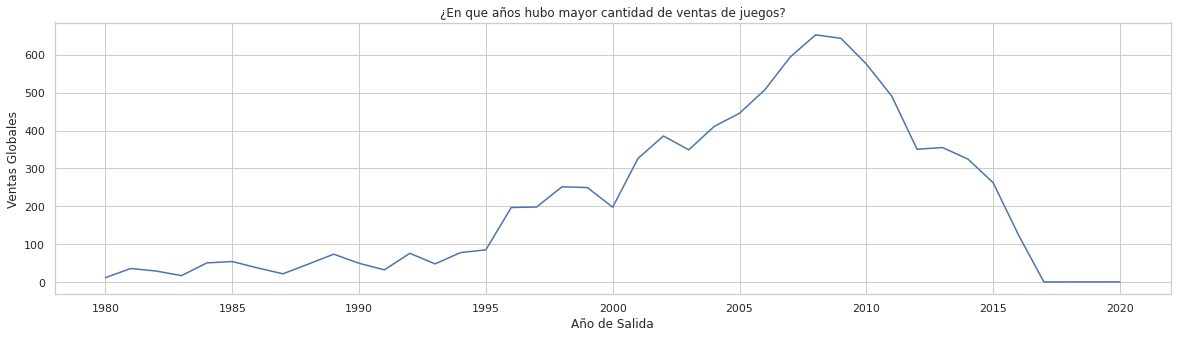

In [ ]:
df_1 = df[['Global_Sales','Year_of_Release']].groupby(by='Year_of_Release').sum('Global_Sales')
df_1
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_1.index,df_1.Global_Sales)
ax.set_xlabel('Año de Salida')                  
ax.set_ylabel('Ventas Globales')
ax.set_title('¿En que años hubo mayor cantidad de ventas de juegos?')
plt.plot()

En este caso podemos observar como el año de mas ventas de videojuegos fue el 2008. 

Text(0.5, 0, 'Plataforma')

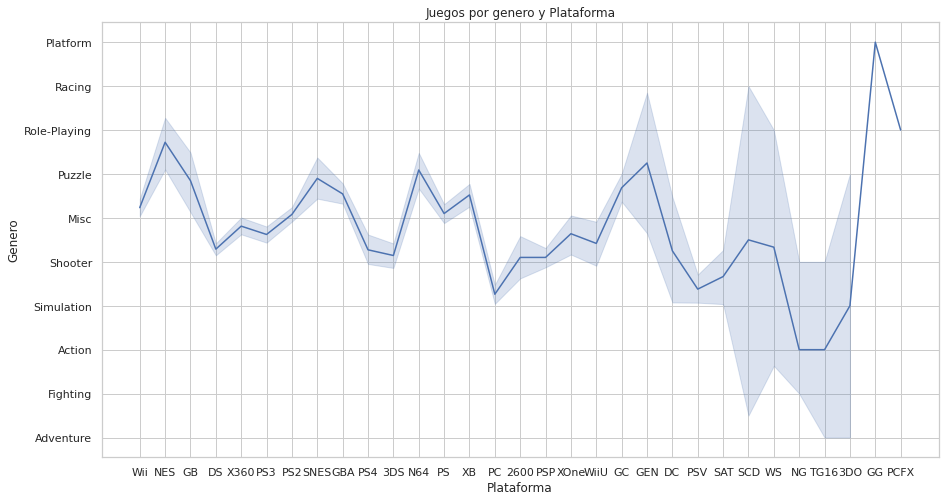

In [ ]:
sns.lineplot(data=df, x='Platform', y="Genre")
plt.title("Juegos por genero y Plataforma")
plt.ylabel("Genero")
plt.xlabel("Plataforma")

En este caso podemos afirmar que cada plataforma tiene un genero caracteristico propio. Ni siquiera las diferentes consolas de una misma marca continuan con un solo genero.

Text(0.5, 0, 'Genero')

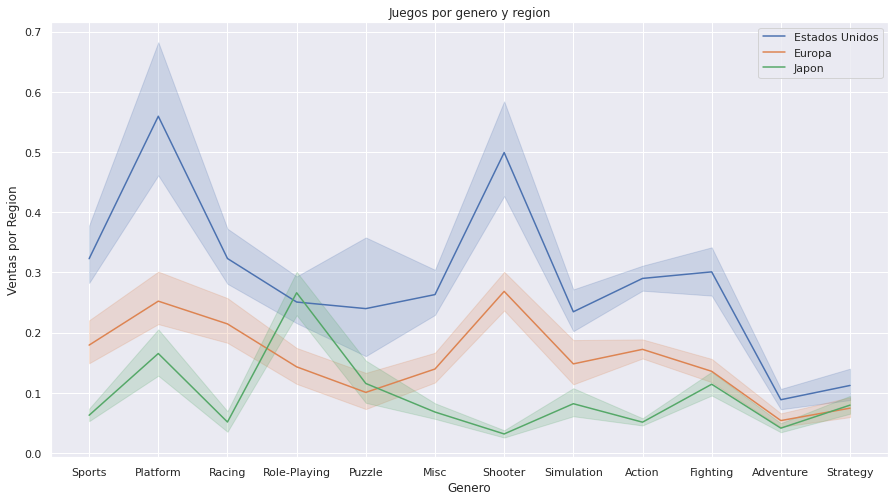

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df, x='Genre', y="NA_Sales")
sns.lineplot(data=df, x='Genre', y="EU_Sales")
sns.lineplot(data=df, x='Genre', y='JP_Sales')
plt.legend(labels=["Estados Unidos","Europa","Japon"])
plt.title("Juegos por genero y region")
plt.ylabel("Ventas por Region")
plt.xlabel("Genero")

Segun esta grafica podemos en primer lugar ver como los RPG son ampliamente vendidos en Japon pero apenas alcanza la misma cantidad de ventas que en Estados Unidos. Esto habla del tamaño superior de ventas de Estados Unidos frente a otros mercados. Por otro lado podemos observar como el mercado europeo es similar en gustos y caracteristicas al mercado de Estados Unidos y a su vez estos son bastante diferentes a los gustos del mercado japones.

Text(0.5, 0, 'Clasificacion')

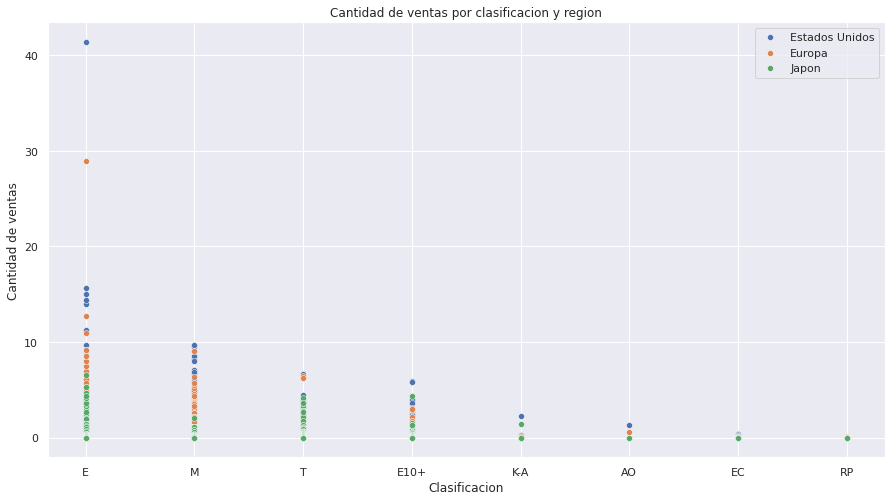

In [ ]:
sns.scatterplot(data=df, x='Rating', y='NA_Sales') 
sns.scatterplot(data=df, x='Rating', y='EU_Sales')
sns.scatterplot(data=df, x='Rating', y='JP_Sales')
plt.legend(labels=["Estados Unidos","Europa","Japon"])
plt.title("Cantidad de ventas por clasificacion y region")
plt.ylabel("Cantidad de ventas")
plt.xlabel("Clasificacion")

Segun esta grafica podemos ver como los juegos con clasificacion E (para todo el mundo) son los mas vendidos en los tres mercados, seguidos por la clasificacion M (Mature +17 años) y T (Teen). Mientras que los menos vendidos son RP (Rating Pending), seguido por EC (Early Childhood) y AO (Adults Only)

### **Estructurando un Proyecto de DS (parte II) - Borda y Pagano**

**Consigna**

Deberemos complementar la parte I con:
1. Abstracto con motivación y audiencia
2. Preguntas/Hipótesis que queremos resolver mediante el análisis de datos
3. Análisis Exploratorio de Datos (EDA)
4. Con base en las visualizaciones y resúmenes numéricos generados del desafío anterior dar recomendaciones basados en los insights observados.
5. Para esta oportunidad se deberán tener avances en los apartados: Definición de objetivo, Contexto comercial, Problema Comercial, Contexto analitico, Exploración de datos (EDA)


**Definicion de Objetivo**

Por medio de este trabajo, nuestro objetivo es definir que tipo de videojuego y en que consola puede llegar a tener mayor exito tanto en el mercado oriental como el occidental.


**Contexto Comercial**

Las empresas desarrolladoras de videojuegos estan cansadas de crear juegos que no sean rentables en algunos de los mayores mercados del mundo, ya sea el mercado japones, estadounidense o europeo. Las diferencias culturales entre los orientales y occidentales afectan tambien a desarrollar un distinto perfil de gamer. Por esto, las empresas de videojuegos nos contrataron para que podamos encontrar que tipo y estilo de juego pueda encajar en la mayor cantidad de perfiles que existen. De esta manera, se aseguraran en un gran porcentaje el exito del nuevo juego.

**Problema Comercial**

Nos hacemos las siguientes preguntas:



*   ¿Que genero de juego tiene mayor aceptacion en los tres mercados?
*   ¿Cuales son esos juegos? ¿Cual es su trama?


*   ¿Que consola tiene mayor aceptacion en los tres mercados?
*   ¿Cual es esta consola? ¿Que la diferencia con las otras?

*   ¿Que juego tiene mayor valoracion por los criticos? ¿Y por los usuarios?
*   ¿Los juegos que tienen mayor valoracion fueron de los mas vendidos en alguno de los mercados?

*   ¿El exito de los juegos en sus ventas globales coincide con el exito en alguno de los tres principales mercados?









**Contexto Analitico**

Junto a este notebook encontraran el archivo "Video_Game_Sales.csv" que contiene los detalles de cada juego. Entre sus columnas, encontraran: 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating', 'Global_Sales'. 

El delimitador en el archivo .CSV brindado es “,”.

In [ ]:
df.head(5)

NameError: ignored

In [ ]:
df.columns

In [ ]:
df.describe

In [ ]:
df.shape



**EDA - EXPLORATORY DATA ANALYSIS**

In [ ]:
#Vemos la vision general de los datos para una primera impresion
df.head(5)

In [ ]:
#Podemos ver los nombres de las columnas de nuestra database y el tamaño de la misma
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

In [ ]:
#podemos ver los tipos de datos y caracteristicas de las variables
df.info()

In [ ]:
#Analizamos los valores nulos
df.isnull().sum()

In [ ]:
#Analizamos los datos numericos y sus datos estadisticos 
df.describe()

Nos llama la atencion la gran diferencia entre el valor del 75% y el maximo de NA_Sales, EU_Sales y JP_Sales. Mas adelante realizaremos un analisis de posibles outliers. Lo mismo ocurre con User_Count

In [ ]:
#Analizamos la correlacion entre los datos
import statsmodels.api as sm
corr = df.set_index('Global_Sales').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Vemos que no existen variables con altas coorelaciones.

In [ ]:
#Analizamos posibles outliers en NA_Sales
plt.figure(figsize=(6,4))
sns.boxplot(df['NA_Sales'])
plt.show()

In [ ]:
#Filtramos los posibles outliers de NA_Sales
outliers_NA_Sales = df[df.NA_Sales > 20]
outliers_NA_Sales.head()

In [ ]:
#Analizamos posibles outliers en EU_Sales
plt.figure(figsize=(6,4))
sns.boxplot(df['EU_Sales'])
plt.show()

In [ ]:
#Filtramos los posibles outliers de EU_Sales
outliers_EU_Sales = df[df.EU_Sales > 25]
outliers_EU_Sales.head()

In [ ]:
#Analizamos posibles outliers en JP_Sales
plt.figure(figsize=(6,4))
sns.boxplot(df['JP_Sales'])
plt.show()

In [ ]:
#Filtramos los posibles outliers de JP_Sales
outliers_JP_Sales = df[df.JP_Sales > 10]
outliers_JP_Sales.head()

Segun nuestro analisis de outliers podemos estimar que no se trate de desvios en la informacion sino que se trata juegos historicos con ventas record como tratarse de Mario Bros, Pokemon Red o Tetris.

In [ ]:
#Analizamos posibles outliers en User_Count
plt.figure(figsize=(6,4))
sns.boxplot(df['User_Count'])
plt.show()

In [ ]:
#Filtramos los posibles outliers de User_Count
outliers_User_Count = df[df.User_Count > 8000]
outliers_User_Count.head()

En este caso podemos ver que los juegos que se encuentran entre los tops de usuarios son juegos de record de ventas por lo que consideramos que no es necesario normalizar estos datos

In [ ]:
df['User_Score'] = pd.to_numeric(df['User_Score'],errors = 'coerce')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder


enc = OrdinalEncoder()
enc.fit(df[["Name"]])
df[["Name_code"]] = enc.transform(df[["Name"]])


In [ ]:
dummy_columns = {
    'Platform': {
        'prefix': 'PLAT',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)

In [ ]:
dummy_columns = {
'Genre': {
        'prefix': 'Genre',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)


In [ ]:
dummy_columns = {
  'Publisher': {
        'prefix': 'Publisher',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)


In [ ]:
dummy_columns = {
    'Developer': {
        'prefix': 'Developer',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)


In [ ]:
dummy_columns = {
    'Rating': {
        'prefix': 'Rating',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformed_df = scaler.fit_transform(df.iloc[:, 5:12])
transformed_df = pd.DataFrame(transformed_df)
df["NA_Sales_Tranformed"] = transformed_df[0]
df["EU_Sales_Tranformed"] = transformed_df[1]
df["JP_Sales_Tranformed"] = transformed_df[2]
df["Critic_Score_Tranformed"] = transformed_df[3]
df["Critic_Count_Tranformed"] = transformed_df[4]
df["User_Score_Tranformed"] = transformed_df[5]
df["User_Count_Tranformed"] = transformed_df[6]


transformed_df = scaler.fit_transform(df.iloc[:, 14:])
transformed_df = pd.DataFrame(transformed_df)
df["Global_Sales_Tranformed"] = transformed_df[0]

df.head()

In [ ]:
#Analizamos los datos numericos y sus datos estadisticos 
df[['NA_Sales','NA_Sales_Tranformed','EU_Sales','EU_Sales_Tranformed','JP_Sales','JP_Sales_Tranformed','Critic_Score','Critic_Score_Tranformed'
,'Critic_Count','Critic_Count_Tranformed','User_Score','User_Score_Tranformed','User_Count','User_Count_Tranformed'
,'Global_Sales','Global_Sales_Tranformed']].describe().T

In [ ]:
df.info() 

###**Estructurando un Proyecto DS (Parte III) - Borda y Pagano**

**Consigna**

Crearán un notebook que complemente el trabajo realizado en los siguientes apartados:

1.   elegir un método de feature selection para reducir la dimensionalidad del dataset.
2.   elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.
3.   cálculo de métricas para validar el modelo.
4.   generar conclusiones con base en los resultados obtenidos. 

In [ ]:
#Eliminamos los datos categoricos para este ejercicio
del df['Name']
del df['Platform']
del df['Genre']
del df['Publisher']
del df['Developer']
del df['Rating']
df.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Name_code,...,Rating_RP,Rating_T,NA_Sales_Tranformed,EU_Sales_Tranformed,JP_Sales_Tranformed,Critic_Score_Tranformed,Critic_Count_Tranformed,User_Score_Tranformed,User_Count_Tranformed,Global_Sales_Tranformed
0,2006.0,41.36,28.96,3.77,76.0,51.0,8.0,322.0,82.53,9896.0,...,0,0,1.000000,1.000000,0.368885,0.741176,0.436364,0.824742,0.029828,1.000000
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN,40.24,8351.0,...,0,0,0.703095,0.123619,0.666341,NaN,NaN,NaN,NaN,0.487518
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0,35.52,4965.0,...,0,0,0.379110,0.440608,0.370841,0.811765,0.636364,0.855670,0.066129,0.430320
3,2009.0,15.61,10.93,3.28,80.0,73.0,8.0,192.0,32.77,9898.0,...,0,0,0.377418,0.377417,0.320939,0.788235,0.636364,0.824742,0.017634,0.396995
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN,31.37,6569.0,...,0,0,0.272485,0.306975,1.000000,NaN,NaN,NaN,NaN,0.380029


In [ ]:
X = df.drop("Global_Sales_Tranformed", 1)       # feature matrix
y = df['Global_Sales_Tranformed']               # target feature
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Name_code,...,Rating_RP,Rating_T,NA_Sales_Tranformed,EU_Sales_Tranformed,JP_Sales_Tranformed,Critic_Score_Tranformed,Critic_Count_Tranformed,User_Score_Tranformed,User_Count_Tranformed,Global_Sales_Tranformed
0,2006.0,41.36,28.96,3.77,76.0,51.0,8.0,322.0,82.53,9896.0,...,0,0,1.000000,1.000000,0.368885,0.741176,0.436364,0.824742,0.029828,1.000000
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN,40.24,8351.0,...,0,0,0.703095,0.123619,0.666341,NaN,NaN,NaN,NaN,0.487518
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0,35.52,4965.0,...,0,0,0.379110,0.440608,0.370841,0.811765,0.636364,0.855670,0.066129,0.430320
3,2009.0,15.61,10.93,3.28,80.0,73.0,8.0,192.0,32.77,9898.0,...,0,0,0.377418,0.377417,0.320939,0.788235,0.636364,0.824742,0.017634,0.396995
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN,31.37,6569.0,...,0,0,0.272485,0.306975,1.000000,NaN,NaN,NaN,NaN,0.380029


In [ ]:
X

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Name_code,...,Rating_M,Rating_RP,Rating_T,NA_Sales_Tranformed,EU_Sales_Tranformed,JP_Sales_Tranformed,Critic_Score_Tranformed,Critic_Count_Tranformed,User_Score_Tranformed,User_Count_Tranformed
0,2006.0,41.36,28.96,3.77,76.0,51.0,8.0,322.0,82.53,9896.0,...,0,0,0,1.000000,1.000000,0.368885,0.741176,0.436364,0.824742,0.029828
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN,40.24,8351.0,...,0,0,0,0.703095,0.123619,0.666341,NaN,NaN,NaN,NaN
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0,35.52,4965.0,...,0,0,0,0.379110,0.440608,0.370841,0.811765,0.636364,0.855670,0.066129
3,2009.0,15.61,10.93,3.28,80.0,73.0,8.0,192.0,32.77,9898.0,...,0,0,0,0.377418,0.377417,0.320939,0.788235,0.636364,0.824742,0.017634
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN,31.37,6569.0,...,0,0,0,0.272485,0.306975,1.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,NaN,NaN,NaN,NaN,0.01,7426.0,...,0,0,0,0.000000,0.000000,0.000978,NaN,NaN,NaN,NaN
14572,2006.0,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01,4568.0,...,0,0,0,0.000000,0.000345,0.000000,NaN,NaN,NaN,NaN
14573,2016.0,0.00,0.00,0.01,NaN,NaN,NaN,NaN,0.01,3443.0,...,0,0,0,0.000000,0.000000,0.000978,NaN,NaN,NaN,NaN
14574,2003.0,0.01,0.00,0.00,NaN,NaN,NaN,NaN,0.01,8026.0,...,0,0,0,0.000242,0.000000,0.000000,NaN,NaN,NaN,NaN


In [ ]:
y

0        1.000000
1        0.487518
2        0.430320
3        0.396995
4        0.380029
           ...   
14571    0.000000
14572    0.000000
14573    0.000000
14574    0.000000
14575    0.000000
Name: Global_Sales_Tranformed, Length: 14576, dtype: float64

In [ ]:
import pandas as pd
df['World Sales'] = df.Global_Sales_Tranformed
X = df.drop('World Sales', 1)       # feature matrix
y = df['World Sales']               # target feature
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Name_code,...,Rating_T,NA_Sales_Tranformed,EU_Sales_Tranformed,JP_Sales_Tranformed,Critic_Score_Tranformed,Critic_Count_Tranformed,User_Score_Tranformed,User_Count_Tranformed,Global_Sales_Tranformed,World Sales
0,2006.0,41.36,28.96,3.77,76.0,51.0,8.0,322.0,82.53,9896.0,...,0,1.000000,1.000000,0.368885,0.741176,0.436364,0.824742,0.029828,1.000000,1.000000
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN,40.24,8351.0,...,0,0.703095,0.123619,0.666341,NaN,NaN,NaN,NaN,0.487518,0.487518
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0,35.52,4965.0,...,0,0.379110,0.440608,0.370841,0.811765,0.636364,0.855670,0.066129,0.430320,0.430320
3,2009.0,15.61,10.93,3.28,80.0,73.0,8.0,192.0,32.77,9898.0,...,0,0.377418,0.377417,0.320939,0.788235,0.636364,0.824742,0.017634,0.396995,0.396995
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN,31.37,6569.0,...,0,0.272485,0.306975,1.000000,NaN,NaN,NaN,NaN,0.380029,0.380029


In [ ]:
X

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Name_code,...,Rating_RP,Rating_T,NA_Sales_Tranformed,EU_Sales_Tranformed,JP_Sales_Tranformed,Critic_Score_Tranformed,Critic_Count_Tranformed,User_Score_Tranformed,User_Count_Tranformed,Global_Sales_Tranformed
0,2006.0,41.36,28.96,3.77,76.0,51.0,8.0,322.0,82.53,9896.0,...,0,0,1.000000,1.000000,0.368885,0.741176,0.436364,0.824742,0.029828,1.000000
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN,40.24,8351.0,...,0,0,0.703095,0.123619,0.666341,NaN,NaN,NaN,NaN,0.487518
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0,35.52,4965.0,...,0,0,0.379110,0.440608,0.370841,0.811765,0.636364,0.855670,0.066129,0.430320
3,2009.0,15.61,10.93,3.28,80.0,73.0,8.0,192.0,32.77,9898.0,...,0,0,0.377418,0.377417,0.320939,0.788235,0.636364,0.824742,0.017634,0.396995
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN,31.37,6569.0,...,0,0,0.272485,0.306975,1.000000,NaN,NaN,NaN,NaN,0.380029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,NaN,NaN,NaN,NaN,0.01,7426.0,...,0,0,0.000000,0.000000,0.000978,NaN,NaN,NaN,NaN,0.000000
14572,2006.0,0.00,0.01,0.00,NaN,NaN,NaN,NaN,0.01,4568.0,...,0,0,0.000000,0.000345,0.000000,NaN,NaN,NaN,NaN,0.000000
14573,2016.0,0.00,0.00,0.01,NaN,NaN,NaN,NaN,0.01,3443.0,...,0,0,0.000000,0.000000,0.000978,NaN,NaN,NaN,NaN,0.000000
14574,2003.0,0.01,0.00,0.00,NaN,NaN,NaN,NaN,0.01,8026.0,...,0,0,0.000242,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000


In [ ]:
y

0        1.000000
1        0.487518
2        0.430320
3        0.396995
4        0.380029
           ...   
14571    0.000000
14572    0.000000
14573    0.000000
14574    0.000000
14575    0.000000
Name: World Sales, Length: 14576, dtype: float64

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features



---



In [ ]:
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

In [ ]:
#Reemplazamos los valores Nan para el modelo
df[df==np.inf]=np.nan
df.fillna(df.mean(0), inplace=True)

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = df
y = abs(pd.Series(df['World Sales'])-1)
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestRegressor(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Mean Absolute Error: 3.9310834237575594e-05
Mean Squared Error: 6.13877462940805e-07
Root Mean Squared Error: 0.0007835033266941532


Vemos que tenemos bajos numeros de error ya sea en absoluto o en cuadratico, esto habla de que el modelo de prediccion tiene una buena proyeccion para el proyecto

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,preds)
print(r2)

0.9984016712352493


Vemos que tenemos un buen r2_Score muy cercano al 1.0, esto reafirma nuestras conclusiones del punto anterior